# Image Search Engine
In order to build this system, we’ll be using a simple, yet effective image descriptor: the color histogram.

By utilizing a color histogram as our image descriptor, we’ll be relying on the color distribution of the image. 

Assumption: Images that have similar color distributions will be considered relevant to each other. Even if images have dramatically different contents, they will still be considered “similar” provided that their color distributions are similar as well.

This is a really important assumption, but is normally a fair and reasonable assumption to make when using color histograms as image descriptors.

## Color Space 

For this search engine we are going to use HSV color space as our color descriptor.

## Number of Bins

We need to define the number of bins in our color histograms. Too few and we will lose the disctinction between images of distinctly different color distributions. Too many bins and we will not be able to identify similar images since the descriptor compares a lot of bins.

For our UKBench image search engine, we’ll be utilizing a 3D color histogram in the HSV color space with 4 bins for the Hue channel, 6 bins for the saturation channel, and 3 bins for the value channel, yielding a total feature vector of dimension 4 x 6 x 3 = 72

## HSVDescriptor Class

In this calss we will define a function that extracts the histogram of the images. Instead of extracting the global histogram, dividing the image into regions and getting the histograms of those regions will simulate locality to our descriptor. 

This is achieved by dividing the image into 5 regions as shown below. 

![](./image/first_cbir_segments.jpg)

There are three functions defined in this class. The __init__ function that reads in the number of bins requested for the histogram. The **descriptor()** function creates the 5 masks described earlier and extracts the histograms for each of these masks. 

Finally the **histgram** function actually extracts the histograms for each of the image slices and normalizes it so that the histogram is independent of  the image size and only dependent on the image's color content.



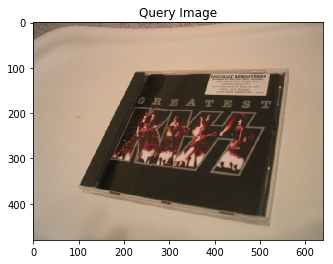

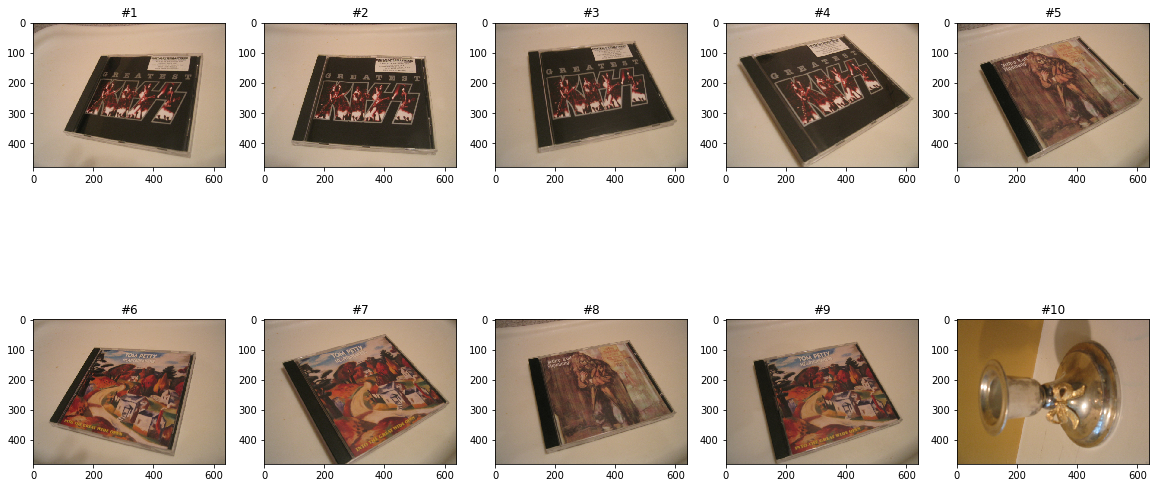

In [34]:
from cbir.hsvdescriptor import HSVdescriptor
from cbir.searcher import Searcher
import argparse
import imutils
import json
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
%matplotlib inline


desc = HSVdescriptor((4, 6, 3))

relevant = json.loads(open('./UKBench_dataset/ukbench/relevant.json').read())

queryFilename = 'ukbench00996.jpg'

queryRelevant = relevant[queryFilename]
query = cv2.imread('./UKBench_dataset/ukbench/'+queryFilename)

#query_rgb = hsv_to_rgb(query)
plt.imshow(cv2.cvtColor(query,cv2.COLOR_BGR2RGB))
plt.title('Query Image')
plt.show()

features = desc.describe(query)
#print(features)
searcher = Searcher('./ukbench_features/index.csv')
result = searcher.search(features,numResults=10)

fig1 = plt.figure(figsize=(20, 10))
for i,r in enumerate(result):
    ax = fig1.add_subplot(2,5,i+1)
    ax.imshow(cv2.cvtColor(cv2.imread('./UKBench_dataset/ukbench/'+r[1]), cv2.COLOR_BGR2RGB))
    ax.set_title('#'+str(i+1))
    #plt.imshow('./UKBench_database/ukbench/'+r)
    
plt.show()

## Summary 
In the above script the process flow is as follows

1. Initialize the HSVdescriptor
2. Initialize a query image
3. Extract image descriptor features of the query image
4. Initialize the Searcher function with the feature indices from the UKBench dataset
5. Search the dataset for the top 10 matches by passing the query features to the Searcher function
6. Loop through the results and plot the returned images